In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam, RMSprop,Adagrad
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
%matplotlib inline  

In [2]:
data = pd.read_csv(r"E:\A_Z Handwritten Data.csv").astype('float32')

print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

In [3]:
X = data.drop('0',axis = 1)
y = data['0']

In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [5]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

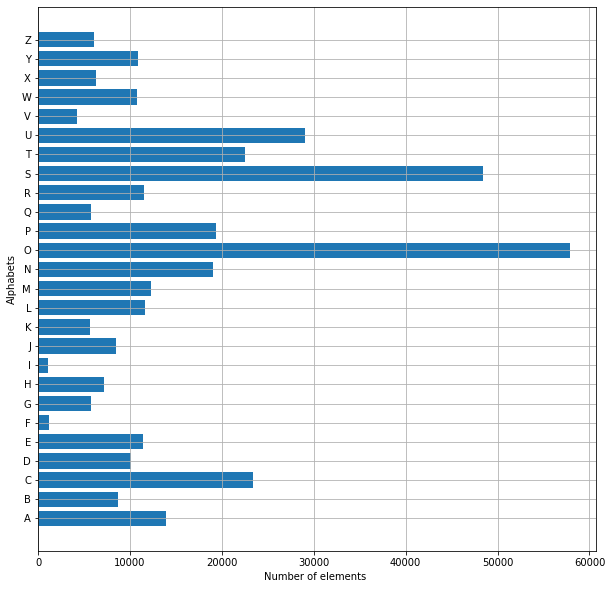

In [6]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

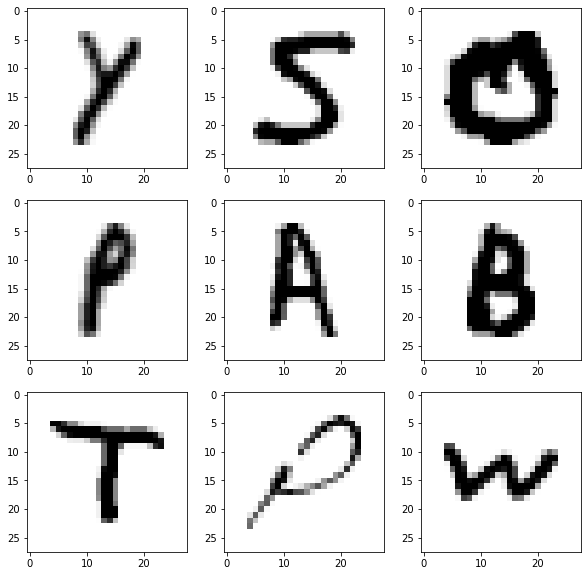

In [7]:
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [8]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [9]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [10]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_yOHE, epochs=10,  validation_data = (test_X,test_yOHE))

Epoch 1/10
9312/9312 [==============================] - 442s 47ms/step - loss: 0.3502 - accuracy: 0.9159 - val_loss: 0.0990 - val_accuracy: 0.9720
Epoch 2/10
9312/9312 [==============================] - 435s 47ms/step - loss: 0.0709 - accuracy: 0.9800 - val_loss: 0.0657 - val_accuracy: 0.9822
Epoch 3/10
9312/9312 [==============================] - 431s 46ms/step - loss: 0.0581 - accuracy: 0.9839 - val_loss: 0.0626 - val_accuracy: 0.9839
Epoch 4/10
9312/9312 [==============================] - 312s 33ms/step - loss: 0.0519 - accuracy: 0.9858 - val_loss: 0.0577 - val_accuracy: 0.9840
Epoch 5/10
9312/9312 [==============================] - 308s 33ms/step - loss: 0.0494 - accuracy: 0.9869 - val_loss: 0.0612 - val_accuracy: 0.9840
Epoch 6/10
9312/9312 [==============================] - 289s 31ms/step - loss: 0.0468 - accuracy: 0.9869 - val_loss: 0.0547 - val_accuracy: 0.9858
Epoch 7/10
9312/9312 [==============================] - 305s 33ms/step - loss: 0.0469 - accuracy: 0.9875 - val_loss: 0

In [31]:
model.compile(optimizer = SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model.fit(train_X, train_yOHE, epochs=10,  validation_data = (test_X,test_yOHE))

Epoch 1/10
9312/9312 [==============================] - 185s 20ms/step - loss: 0.0288 - accuracy: 0.9925 - val_loss: 0.0516 - val_accuracy: 0.9897
Epoch 2/10
9312/9312 [==============================] - 201s 22ms/step - loss: 0.0222 - accuracy: 0.9936 - val_loss: 0.0495 - val_accuracy: 0.9908
Epoch 3/10
9312/9312 [==============================] - 201s 22ms/step - loss: 0.0195 - accuracy: 0.9944 - val_loss: 0.0486 - val_accuracy: 0.9911
Epoch 4/10
9312/9312 [==============================] - 201s 22ms/step - loss: 0.0177 - accuracy: 0.9950 - val_loss: 0.0450 - val_accuracy: 0.9917
Epoch 5/10
9312/9312 [==============================] - 215s 23ms/step - loss: 0.0159 - accuracy: 0.9954 - val_loss: 0.0449 - val_accuracy: 0.9917
Epoch 6/10
9312/9312 [==============================] - 219s 24ms/step - loss: 0.0162 - accuracy: 0.9952 - val_loss: 0.0465 - val_accuracy: 0.9917
Epoch 7/10
9312/9312 [==============================] - 200s 21ms/step - loss: 0.0143 - accuracy: 0.9958 - val_loss: 0

In [14]:
model.compile(optimizer = RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(train_X, train_yOHE, epochs=10,  validation_data = (test_X,test_yOHE))

Epoch 1/10
9312/9312 [==============================] - 208s 22ms/step - loss: 0.4093 - accuracy: 0.9092 - val_loss: 0.1137 - val_accuracy: 0.9718
Epoch 2/10
9312/9312 [==============================] - 206s 22ms/step - loss: 0.1726 - accuracy: 0.9632 - val_loss: 0.1842 - val_accuracy: 0.9595y: 0.96
Epoch 3/10
9312/9312 [==============================] - 198s 21ms/step - loss: 0.2705 - accuracy: 0.9574 - val_loss: 0.2473 - val_accuracy: 0.9544
Epoch 4/10
9312/9312 [==============================] - 192s 21ms/step - loss: 0.2552 - accuracy: 0.9546 - val_loss: 0.2391 - val_accuracy: 0.9635
Epoch 5/10
9312/9312 [==============================] - 192s 21ms/step - loss: 0.3058 - accuracy: 0.9490 - val_loss: 0.2227 - val_accuracy: 0.9634
Epoch 6/10
9312/9312 [==============================] - 192s 21ms/step - loss: 0.3366 - accuracy: 0.9492 - val_loss: 0.2670 - val_accuracy: 0.9527
Epoch 7/10
9312/9312 [==============================] - 192s 21ms/step - loss: 0.3203 - accuracy: 0.9475 - val_

In [20]:
model.compile(optimizer = Adagrad(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model.fit(train_X, train_yOHE, epochs=10,  validation_data = (test_X,test_yOHE))

Epoch 1/10
9312/9312 [==============================] - 212s 23ms/step - loss: 0.1580 - accuracy: 0.9697 - val_loss: 0.1417 - val_accuracy: 0.9700
Epoch 2/10
9312/9312 [==============================] - 252s 27ms/step - loss: 0.1239 - accuracy: 0.9732 - val_loss: 0.1341 - val_accuracy: 0.9717
Epoch 3/10
9312/9312 [==============================] - 231s 25ms/step - loss: 0.1145 - accuracy: 0.9747 - val_loss: 0.1291 - val_accuracy: 0.9724
Epoch 4/10
9312/9312 [==============================] - 220s 24ms/step - loss: 0.1150 - accuracy: 0.9750 - val_loss: 0.1266 - val_accuracy: 0.9733
Epoch 5/10
9312/9312 [==============================] - 196s 21ms/step - loss: 0.1098 - accuracy: 0.9757 - val_loss: 0.1243 - val_accuracy: 0.9730
Epoch 6/10
9312/9312 [==============================] - 223s 24ms/step - loss: 0.1067 - accuracy: 0.9759 - val_loss: 0.1220 - val_accuracy: 0.9740
Epoch 7/10
9312/9312 [==============================] - 236s 25ms/step - loss: 0.1049 - accuracy: 0.9763 - val_loss: 0

In [12]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [13]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9763860702514648, 0.980628252029419, 0.9851792454719543, 0.9835816621780396, 0.9829373359680176, 0.9862800240516663, 0.9831520915031433, 0.9838770031929016, 0.9865753650665283, 0.9839709997177124]
The training accuracy is : [0.9566116333007812, 0.9794133305549622, 0.9831185340881348, 0.9845314621925354, 0.9859914183616638, 0.9864478707313538, 0.9870855212211609, 0.9875889420509338, 0.9878842830657959, 0.9881527423858643]
The validation loss is : [0.08304934203624725, 0.07623341679573059, 0.058815546333789825, 0.06317124515771866, 0.0668749138712883, 0.05851798132061958, 0.07682983577251434, 0.0654933974146843, 0.06657461822032928, 0.07281868159770966]
The training loss is : [0.15656068921089172, 0.07355041056871414, 0.06165274232625961, 0.05703096091747284, 0.05227656289935112, 0.051926009356975555, 0.04963411018252373, 0.0495469830930233, 0.04992778226733208, 0.04868834838271141]


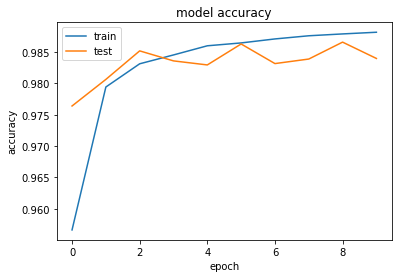

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy-Adam')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

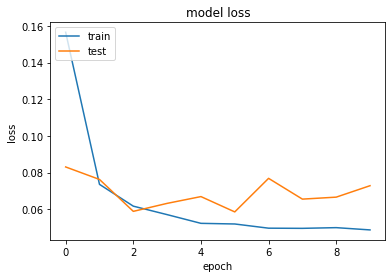

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss-Adam')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
print("The validation accuracy is :", history1.history['val_accuracy'])
print("The training accuracy is :", history1.history['accuracy'])
print("The validation loss is :", history1.history['val_loss'])
print("The training loss is :", history1.history['loss'])

The validation accuracy is : [0.9896898865699768, 0.9908309578895569, 0.9910726547241211, 0.9917035698890686, 0.9917035698890686, 0.9916901588439941, 0.991878092288971, 0.9923076629638672, 0.992374837398529, 0.9917706847190857]
The training accuracy is : [0.9931400418281555, 0.9941334128379822, 0.9945966005325317, 0.9950563907623291, 0.9952409863471985, 0.9955061078071594, 0.9956806302070618, 0.9958518147468567, 0.9959222674369812, 0.996120274066925]
The validation loss is : [0.0515725314617157, 0.04946903511881828, 0.048632875084877014, 0.04500095546245575, 0.04486070200800896, 0.04652537778019905, 0.043549537658691406, 0.04525863006711006, 0.04502061754465103, 0.047559574246406555]
The training loss is : [0.025820281356573105, 0.02115786261856556, 0.019023675471544266, 0.017507635056972504, 0.016438940539956093, 0.015545523725450039, 0.014878438785672188, 0.014244112186133862, 0.013911047019064426, 0.01318288967013359]


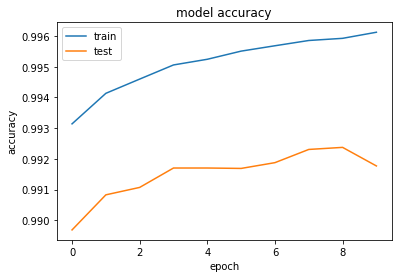

In [34]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy-SGD')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss-SGD')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'plt' is not defined

In [17]:
print("The validation accuracy is :", history2.history['val_accuracy'])
print("The training accuracy is :", history2.history['accuracy'])
print("The validation loss is :", history2.history['val_loss'])
print("The training loss is :", history2.history['loss'])

The validation accuracy is : [0.9717546105384827, 0.9595113396644592, 0.9544368386268616, 0.9635118842124939, 0.9634044766426086, 0.9526916146278381, 0.9449590444564819, 0.9608806371688843, 0.9541146755218506, 0.9592831134796143]
The training accuracy is : [0.952386200428009, 0.9606188535690308, 0.9562222957611084, 0.9537555575370789, 0.9481943845748901, 0.9480198621749878, 0.946613609790802, 0.9444119930267334, 0.9442106485366821, 0.9406128525733948]
The validation loss is : [0.11367422342300415, 0.18421213328838348, 0.24729275703430176, 0.23912447690963745, 0.22274810075759888, 0.2669501006603241, 0.2893083691596985, 0.3385814428329468, 0.6070732474327087, 0.393977552652359]
The training loss is : [0.19375544786453247, 0.20258350670337677, 0.26296961307525635, 0.2682729661464691, 0.31115344166755676, 0.32007506489753723, 0.32242441177368164, 0.35131582617759705, 0.35460418462753296, 0.39011064171791077]


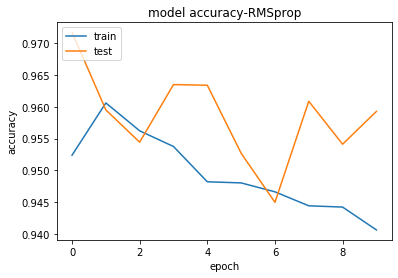

In [18]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy-RMSprop')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

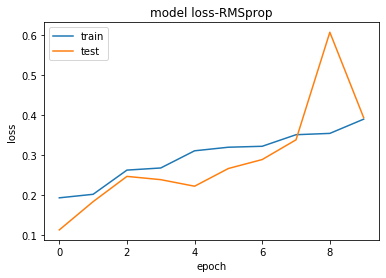

In [19]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss-RMSprop')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
print("The validation accuracy is :", history3.history['val_accuracy'])
print("The training accuracy is :", history3.history['accuracy'])
print("The validation loss is :", history3.history['val_loss'])
print("The training loss is :", history3.history['loss'])

The validation accuracy is : [0.9699556827545166, 0.9716740250587463, 0.9723855257034302, 0.973325252532959, 0.9729762673377991, 0.9739562273025513, 0.9744529724121094, 0.9742649793624878, 0.9745469093322754, 0.9750301837921143]
The training accuracy is : [0.9705833196640015, 0.9734863638877869, 0.9746207594871521, 0.9753926992416382, 0.9758490920066833, 0.9761075377464294, 0.9765102863311768, 0.9768022298812866, 0.9772452712059021, 0.9773761630058289]
The validation loss is : [0.14174844324588776, 0.1340864598751068, 0.12911807000637054, 0.12655335664749146, 0.12428601831197739, 0.12203899025917053, 0.12154224514961243, 0.11970237642526627, 0.11861506849527359, 0.11817850917577744]
The training loss is : [0.14228485524654388, 0.1221046894788742, 0.11532080918550491, 0.11095007508993149, 0.10776317119598389, 0.10530928522348404, 0.10317995399236679, 0.10145406424999237, 0.09987032413482666, 0.09853475540876389]


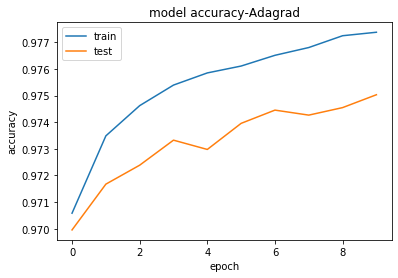

In [22]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy-Adagrad')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

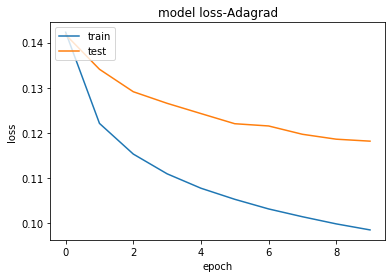

In [24]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss-Adagrad')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
pred = model.predict(test_X[:9])
print(test_X.shape)

(74490, 28, 28, 1)


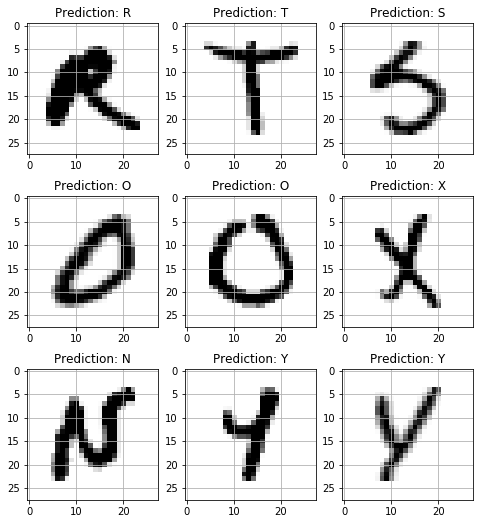

In [17]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [18]:
img = cv2.imread(r'C:\Users\wretc\Downloads\letter A.png')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

In [19]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [20]:
img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "_ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Handwritten character recognition _ _ _ ', img)

In [ ]:
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()